# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import copy           #use copy package for deepcopy of initial weights
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [2]:
class Neural_Network:
    
    

    """
    This lab implements a Neural Network Classifier.
    """

    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the Neural classifer to 
        random values.

        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        #initializing weights
        self.theta1 = np.random.randn(input_dim, hidden_dim)/np.sqrt(input_dim)      
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim)/np.sqrt(hidden_dim)    
        self.bias2 = np.zeros((1, output_dim))
        
        #making a copy of initialized weigths to run the regularization fit on the same model
        self.temptheta1 = copy.deepcopy(self.theta1) 
        self.tempbias1 = copy.deepcopy(self.bias1)
        self.temptheta2 = copy.deepcopy(self.theta2)
        self.tempbias2 = copy.deepcopy(self.bias2)

    #--------------------------------------------------------------------------
  

    def compute_cost_with_regularization(self, X,a3, y, lambd=0.7):
        """
        Computes the cross-entropy cost 

        Arguments:
        a3 -- The sigmoid output of the activation, of shape (1, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        X -- dataset X
        lambd -- regularization hyperparameter, scalar

        Returns:
        cost - value of the regularized loss function (formula (2))
        """

        m = X.shape[0] # number of example
       

        # Compute the cross-entropy cost
        logprobs = np.multiply(y, np.log(a3)) + np.multiply((1 - y), np.log(1 - a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)

        # Compute L2 regularization cost
        L2_regularization_cost = (np.sum(np.square(self.theta1)) + np.sum(np.square(self.theta2)))*(lambd/(2*m))

        # add cross_entropy_cost and L2_regularization_cost
        cost = cross_entropy_cost + L2_regularization_cost

        # makes sure cost is the dimension we expect. 
        cost = np.squeeze(cost)

        return cost
    
    def compute_cost(self, X, a3, one_hot_y):
        """
        Computes the cross-entropy cost 

        Arguments:
        a3 -- The sigmoid output of the activation, of shape (1, number of examples)
        one_hot_Y -- "true" labels vector of shape (1, number of examples)
        X -- dataset X

        Returns:
        cost - value of the regularized loss function (formula (2))
        """
        
        m = X.shape[0]
        
        
        # Compute the cross-entropy cost

        logprobs = np.multiply(one_hot_y, np.log(a3)) + np.multiply((1-one_hot_y), np.log(1-a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)
        
        return cross_entropy_cost

    #--------------------------------------------------------------------------
 
    def predict_regularization(self,X):
        """
        Makes a prediction based on current model parameters with L2 regularization.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        z3 = np.dot(a2, self.theta2) + self.bias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        predictions = np.argmax(a3, axis = 1)
        
        return predictions
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.temptheta1) + self.tempbias1
        a2 = np.tanh(z2)
        z3 = np.dot(a2, self.temptheta2) + self.tempbias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        predictions = np.argmax(a3, axis = 1)
        
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit_regularization(self,X,y,num_epochs,alpha=0.01,lambd=0.7, flag = 1):
    
        #Learns model parameters to fit the data.
  
        costs=list()
        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.theta1) + self.bias1
            a2 = np.tanh(z2) # use tanh function
            z3 = np.dot(a2, self.theta2) + self.bias2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
            
            

        
            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
           
            beta3 = a3 - one_hot_y
            beta2 = np.multiply(beta3.dot(self.theta2.T),(1-np.power(a2,2)))

         
    
            # number of samples
            
            m = X.shape[0]
            
            # Compute gradients of model parameters
            dtheta2 = 1/m*np.dot(a2.T,beta3) + (lambd/m)*self.theta2
            dbias2 = 1/m*np.sum(beta3, axis=0)
            
            
            dtheta1 = 1/m*np.dot(X.T,beta2) + (lambd/m)*self.theta1
            dbias1 = 1/m*np.sum(beta2, axis=0)
            costs.append(self.compute_cost_with_regularization(X,a3,one_hot_y)) #calculating cost
            if flag == 1:
                if epoch%100 == 0:
                    print("Cost for epoch", epoch, "is", costs[epoch]) #printing cost of every 10th epoch

            # Gradient descent parameter update
            self.theta1 -= alpha * dtheta1
            self.bias1 -= alpha * dbias1
            
            self.theta2 -= alpha * dtheta2
            self.bias2 -= alpha * dbias2
            
            

        return 0

    def fit(self,X,y,num_epochs,alpha=0.01, flag=1):
    
        #Learns model parameters to fit the data.
        costs1 = list()
        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.temptheta1) + self.tempbias1
            a2 = np.tanh(z2)
            z3 = np.dot(a2, self.temptheta2) + self.tempbias2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)

            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1

            beta3 = a3 - one_hot_y

            # Get number of samples
            m = X.shape[0]

            # Compute gradients of model parameters
            dtheta2 = 1/m*(a2.T).dot(beta3)
            dbias2 = 1/m*np.sum(beta3, axis=0)

            beta2 = np.multiply(beta3.dot(self.temptheta2.T),(1-np.power(a2,2)))

            dtheta1 = 1/m*np.dot(X.T,beta2)
            dbias1 = 1/m*np.sum(beta2, axis=0)
            costs1.append(self.compute_cost(X,a3,one_hot_y)) #calculating cost
            if flag == 1:                    
                if epoch%100 == 0:
                    print("Cost for epoch", epoch, "is", costs1[epoch]) #printing cost of every 10th epoch


            # Gradient descent parameter update
            self.temptheta1 -= alpha * dtheta1
            self.tempbias1 -= alpha * dbias1

            self.temptheta2 -= alpha * dtheta2
            self.tempbias2 -= alpha * dbias2
#             
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()
    
def plot_decision_boundary_regularization(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict_regularization(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [4]:
#1. Load data 
#nonlinear data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
#linear data
X1 = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y1 = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

## Nonlinear data 

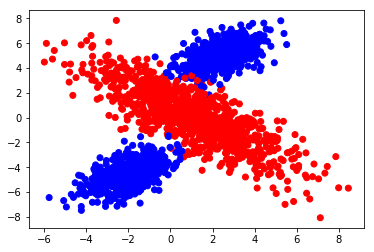

In [5]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

## 5-fold cross validation

In [6]:
#spliting dataset X
xtrain=[]
xtest = np.split(X,5)
for i in range(0,5):
    xtrain.append(np.asarray([x for x in X if x not in xtest[i]]))
xtrain = np.asarray(xtrain)

#spliting dataset y
ytest = np.split(y,5)
ytrain = []
ytrain.append(y[400:2000])
ytrain.append(np.concatenate((y[:400],y[800:2000])))
ytrain.append(np.concatenate((y[:800],y[1200:2000])))
ytrain.append(np.concatenate((y[:1200],y[1600:2000])))
ytrain.append(y[:1600])
ytrain = np.asarray(ytrain)

In [7]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
nnmodel = Neural_Network(input_dim,10,output_dim)

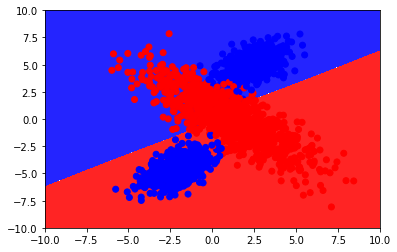

In [8]:
#4. Plot decision boundary
plot_decision_boundary(nnmodel, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

## Model: nonlinear data with regularization

Cost for epoch 0 is 1.3940356218475523
Cost for epoch 100 is 1.2537144853261317
Cost for epoch 200 is 1.2129314958686526
Cost for epoch 300 is 1.168049055058706
Cost for epoch 400 is 1.1196524757450168
Cost for epoch 500 is 1.0685562543393585
Cost for epoch 600 is 1.015519672518037
Cost for epoch 700 is 0.9613467318232402
Cost for epoch 800 is 0.9069241637756539
Cost for epoch 900 is 0.8532551908897795


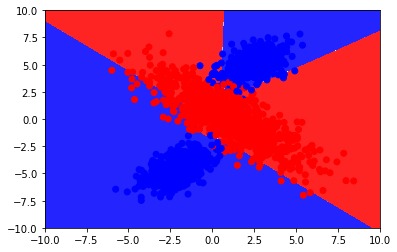

ACCURACY:  0.925
CONFUSION MATRIX: 
 [[195.  26.]
 [  4. 175.]]
Cost for epoch 0 is 0.8096345816828505
Cost for epoch 100 is 0.7591025908264272
Cost for epoch 200 is 0.7126363127600652
Cost for epoch 300 is 0.669953647150886
Cost for epoch 400 is 0.6311667717270912
Cost for epoch 500 is 0.5961168532492248
Cost for epoch 600 is 0.5644786154706246
Cost for epoch 700 is 0.5358656061140743
Cost for epoch 800 is 0.5099001624941824
Cost for epoch 900 is 0.4862451043604893


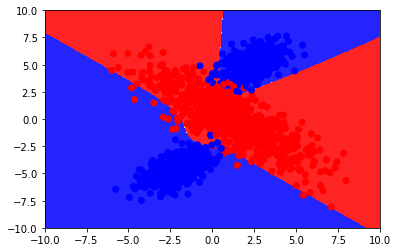

ACCURACY:  0.9725
CONFUSION MATRIX: 
 [[183.   5.]
 [  6. 206.]]
Cost for epoch 0 is 0.4506285484338262
Cost for epoch 100 is 0.4305552333585465
Cost for epoch 200 is 0.41210042119125584
Cost for epoch 300 is 0.39506993899795917
Cost for epoch 400 is 0.37930757809177723
Cost for epoch 500 is 0.36467719069936044
Cost for epoch 600 is 0.35105933641626846
Cost for epoch 700 is 0.3383492997246168
Cost for epoch 800 is 0.32645553306405145
Cost for epoch 900 is 0.31529836914696635


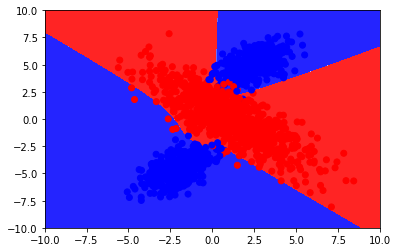

ACCURACY:  0.97
CONFUSION MATRIX: 
 [[193.   6.]
 [  6. 195.]]
Cost for epoch 0 is 0.30867758482186375
Cost for epoch 100 is 0.2986322455710353
Cost for epoch 200 is 0.28932500495888575
Cost for epoch 300 is 0.28057045814844206
Cost for epoch 400 is 0.2723100709199793
Cost for epoch 500 is 0.2645052586128032
Cost for epoch 600 is 0.2571244761855064
Cost for epoch 700 is 0.25013918150732023
Cost for epoch 800 is 0.24352219901334068
Cost for epoch 900 is 0.23724738108559768


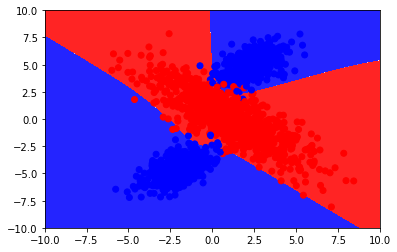

ACCURACY:  0.9775
CONFUSION MATRIX: 
 [[214.   6.]
 [  3. 177.]]
Cost for epoch 0 is 0.23749343903447676
Cost for epoch 100 is 0.2310352715712197
Cost for epoch 200 is 0.22537363114042622
Cost for epoch 300 is 0.22003309417851974
Cost for epoch 400 is 0.21496468179860137
Cost for epoch 500 is 0.21014644167640048
Cost for epoch 600 is 0.20556123611443544
Cost for epoch 700 is 0.20119426556328215
Cost for epoch 800 is 0.1970325263118319
Cost for epoch 900 is 0.1930645763074516


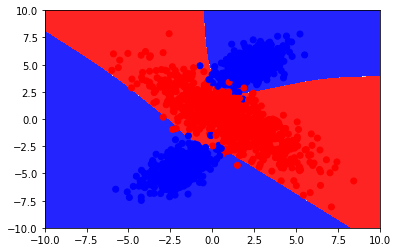

ACCURACY:  0.9825
CONFUSION MATRIX: 
 [[194.   5.]
 [  2. 199.]]
Average ACCURACY of 5 folds:  0.9654999999999999


In [9]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit_regularization(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary_regularization(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict_regularization(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)



## Model: nonlinear data with out regularization

Cost for epoch 0 is 1.3920326028025485
Cost for epoch 100 is 1.2516571134037082
Cost for epoch 200 is 1.2107973929735678
Cost for epoch 300 is 1.1658308142177152
Cost for epoch 400 is 1.1173507199860364
Cost for epoch 500 is 1.0661757359467412
Cost for epoch 600 is 1.0130655169906064
Cost for epoch 700 is 0.9588222894693076
Cost for epoch 800 is 0.904328339192734
Cost for epoch 900 is 0.8505810596852749


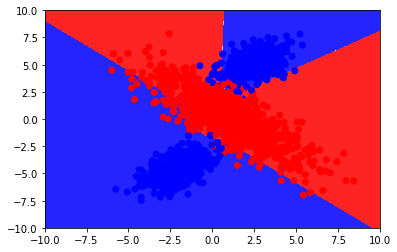

ACCURACY:  0.925
CONFUSION MATRIX: 
 [[195.  26.]
 [  4. 175.]]
Cost for epoch 0 is 0.8069263353593727
Cost for epoch 100 is 0.7562977235467581
Cost for epoch 200 is 0.7097226883828893
Cost for epoch 300 is 0.6669241349792137
Cost for epoch 400 is 0.6280213951300363
Cost for epoch 500 is 0.5928620166449413
Cost for epoch 600 is 0.561124475947153
Cost for epoch 700 is 0.5324232421112275
Cost for epoch 800 is 0.5063797105279271
Cost for epoch 900 is 0.48265504212095234


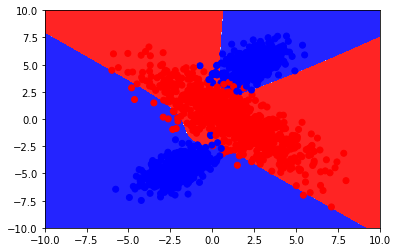

ACCURACY:  0.9725
CONFUSION MATRIX: 
 [[183.   5.]
 [  6. 206.]]
Cost for epoch 0 is 0.44685857808293783
Cost for epoch 100 is 0.42672164429738857
Cost for epoch 200 is 0.4082067646464321
Cost for epoch 300 is 0.3911196440838394
Cost for epoch 400 is 0.3753038510867329
Cost for epoch 500 is 0.3606230123850749
Cost for epoch 600 is 0.3469574610865559
Cost for epoch 700 is 0.3342022443672235
Cost for epoch 800 is 0.3222655606573332
Cost for epoch 900 is 0.3110674744304509


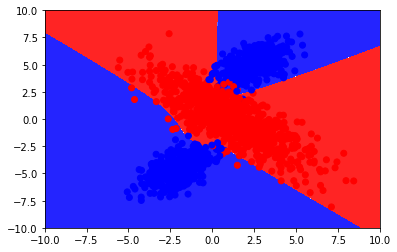

ACCURACY:  0.97
CONFUSION MATRIX: 
 [[193.   6.]
 [  6. 195.]]
Cost for epoch 0 is 0.30438434718511476
Cost for epoch 100 is 0.29430275480923374
Cost for epoch 200 is 0.2849605346694136
Cost for epoch 300 is 0.2761719434378962
Cost for epoch 400 is 0.2678785141454913
Cost for epoch 500 is 0.2600418562137004
Cost for epoch 600 is 0.25263071288323535
Cost for epoch 700 is 0.24561682796622436
Cost for epoch 800 is 0.23897320243863768
Cost for epoch 900 is 0.23267369154335021


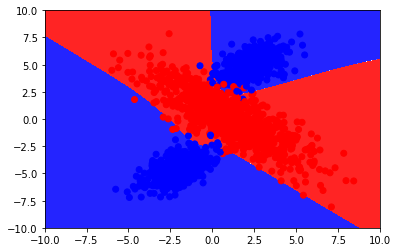

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[215.   6.]
 [  2. 177.]]
Cost for epoch 0 is 0.2329513136792071
Cost for epoch 100 is 0.22645140805031908
Cost for epoch 200 is 0.22076061597700056
Cost for epoch 300 is 0.21539316979390782
Cost for epoch 400 is 0.21029934569939449
Cost for epoch 500 is 0.20545688143947735
Cost for epoch 600 is 0.20084830031457623
Cost for epoch 700 is 0.19645836998548546
Cost for epoch 800 is 0.19227355045972616
Cost for epoch 900 is 0.18828177226558054


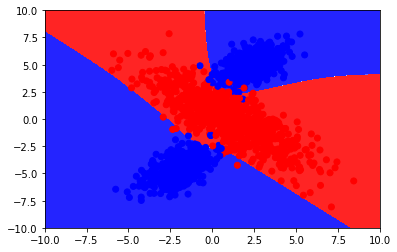

ACCURACY:  0.9825
CONFUSION MATRIX: 
 [[194.   5.]
 [  2. 199.]]
Average ACCURACY of 5 folds:  0.966


In [10]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc 
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)


## Demonstrating the effect of change in learning rate on training of the network


In [11]:
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 10
nnmodel = Neural_Network(input_dim, hidden_dim, output_dim)

In [12]:
theta1 = copy.deepcopy(nnmodel.theta1)
theta2 = copy.deepcopy(nnmodel.theta2)
bias1 = copy.deepcopy(nnmodel.bias1)
bias2 = copy.deepcopy(nnmodel.bias2)

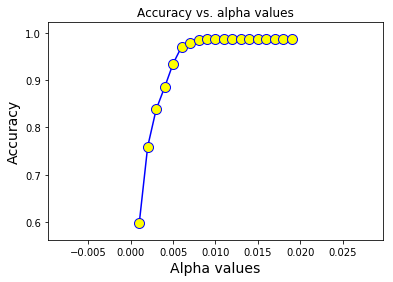

In [13]:
# demonstrating the effect of change in learning rate on training of the network
alphalist = list(np.arange(0.001,0.02,0.001))                       # range of alpha values to test
accuracylist = [] 
for a in alphalist:
    nnmodel.theta1 = copy.deepcopy(theta1)
    nnmodel.theta2 = copy.deepcopy(theta2)
    nnmodel.bias1 = copy.deepcopy(bias1)
    nnmodel.bias2 = copy.deepcopy(bias2)
    nnmodel.fit(X, y, 1000, alpha=a, flag=2)
    accuracy = 0
    y_pred = nnmodel.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            accuracy += 1
    accuracy = accuracy / len(y_pred)
    accuracylist.append(accuracy)

# Plot the accuracy against the alpha value
plt.scatter(alphalist, accuracylist)
plt.title ('Accuracy vs. alpha values')
plt.xlabel('Alpha values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.plot(alphalist, accuracylist, color ='blue', linestyle = 'solid',
marker ='o', markerfacecolor ='yellow', markersize =10)
plt.show()

## Linear data

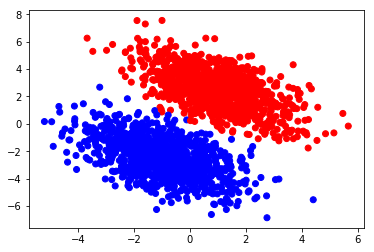

In [14]:
#2. plot data
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

## 5-fold cross validation

In [15]:
#splitting dataset X
xtrain=[]
xtest = np.split(X1,5)
for i in range(0,5):
    xtrain.append(np.asarray([x for x in X1 if x not in xtest[i]]))
xtrain = np.asarray(xtrain)

#splitting dataset y
ytest = np.split(y1,5)
ytrain = []
ytrain.append(y1[400:2000])
ytrain.append(np.concatenate((y1[:400],y1[800:2000])))
ytrain.append(np.concatenate((y1[:800],y1[1200:2000])))
ytrain.append(np.concatenate((y1[:1200],y1[1600:2000])))
ytrain.append(y1[:1600])
ytrain = np.asarray(ytrain)

In [16]:
#3. Initialize model
input_dim = np.shape(X1)[1]
output_dim = np.max(y1) + 1
nnmodel = Neural_Network(input_dim,10,output_dim)

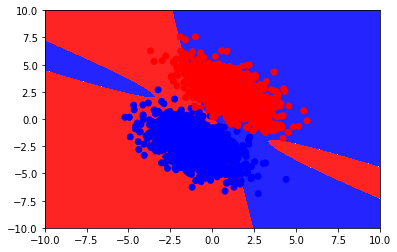

In [17]:
#4. Plot decision boundary
plot_decision_boundary(nnmodel, X1, y1)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

## Model: linear data with regularization

Cost for epoch 0 is 2.1828502978382187
Cost for epoch 100 is 0.33036223797040876
Cost for epoch 200 is 0.18475738598821548
Cost for epoch 300 is 0.13031520816447226
Cost for epoch 400 is 0.10156599796657567
Cost for epoch 500 is 0.08377385802670759
Cost for epoch 600 is 0.07167919151252938
Cost for epoch 700 is 0.06292468350654738
Cost for epoch 800 is 0.05629471113900808
Cost for epoch 900 is 0.05109895626401537


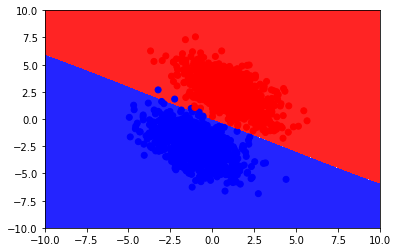

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[202.   0.]
 [  1. 197.]]
Cost for epoch 0 is 0.04576217257882724
Cost for epoch 100 is 0.04238441182528202
Cost for epoch 200 is 0.03956421708641078
Cost for epoch 300 is 0.037173800909157104
Cost for epoch 400 is 0.035121610385227126
Cost for epoch 500 is 0.03334037920155123
Cost for epoch 600 is 0.031779602850507654
Cost for epoch 700 is 0.03040063916457031
Cost for epoch 800 is 0.02917342572636484
Cost for epoch 900 is 0.02807422534445923


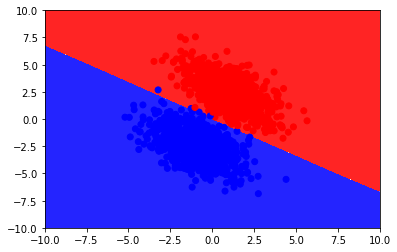

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[197.   0.]
 [  1. 202.]]
Cost for epoch 0 is 0.02517340477348115
Cost for epoch 100 is 0.02438171311408857
Cost for epoch 200 is 0.02366451339591466
Cost for epoch 300 is 0.023011727775286147
Cost for epoch 400 is 0.022415037913460945
Cost for epoch 500 is 0.02186751339067913
Cost for epoch 600 is 0.021363331192729818
Cost for epoch 700 is 0.02089756107416409
Cost for epoch 800 is 0.020465999314115104
Cost for epoch 900 is 0.020065038521235156


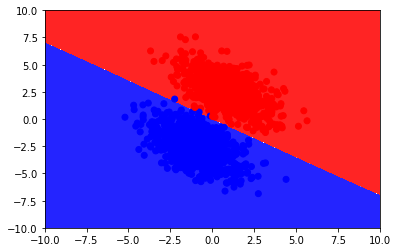

ACCURACY:  0.995
CONFUSION MATRIX: 
 [[203.   0.]
 [  2. 195.]]
Cost for epoch 0 is 0.023588036503456547
Cost for epoch 100 is 0.023135514878052425
Cost for epoch 200 is 0.022715199733569294
Cost for epoch 300 is 0.022324089407405955
Cost for epoch 400 is 0.021959501116709787
Cost for epoch 500 is 0.02161903169829802
Cost for epoch 600 is 0.021300524857958594
Cost for epoch 700 is 0.02100204335558492
Cost for epoch 800 is 0.02072184501878455
Cost for epoch 900 is 0.020458361803736808


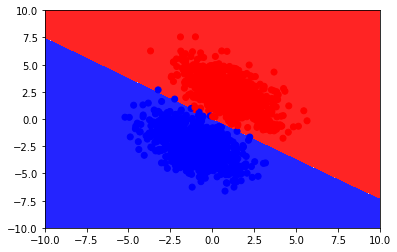

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[192.   0.]
 [  0. 208.]]
Cost for epoch 0 is 0.019600048703513593
Cost for epoch 100 is 0.019356357818047044
Cost for epoch 200 is 0.01912620311794042
Cost for epoch 300 is 0.0189084993290205
Cost for epoch 400 is 0.01870226536767285
Cost for epoch 500 is 0.018506613391321817
Cost for epoch 600 is 0.018320739059968474
Cost for epoch 700 is 0.018143912865352066
Cost for epoch 800 is 0.017975472405090346
Cost for epoch 900 is 0.017814815495432155


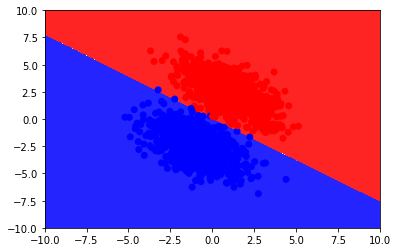

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[202.   0.]
 [  0. 198.]]
Average ACCURACY of 5 folds:  0.998


In [18]:
avg_fold=0
for i in range(5):
    #5. Train the model with l2 regularization
    nnmodel.fit_regularization(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary_regularization(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict_regularization(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)


print ('Average ACCURACY of 5 folds: ', avg_fold / 5)



## Model: linear data with out regularization

Cost for epoch 0 is 2.1801454524181083
Cost for epoch 100 is 0.32751049650815345
Cost for epoch 200 is 0.18178017910851865
Cost for epoch 300 is 0.12724952652427168
Cost for epoch 400 is 0.09843142121210631
Cost for epoch 500 is 0.08058261086537367
Cost for epoch 600 is 0.06843959918348563
Cost for epoch 700 is 0.05964274941406259
Cost for epoch 800 is 0.052974945694929845
Cost for epoch 900 is 0.047744855137621854


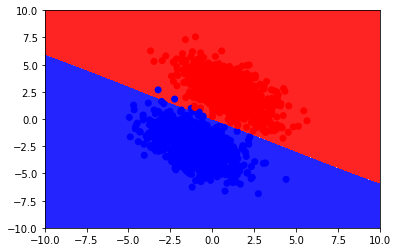

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[202.   0.]
 [  1. 197.]]
Cost for epoch 0 is 0.042371872412922514
Cost for epoch 100 is 0.03896532908014545
Cost for epoch 200 is 0.036118309472032706
Cost for epoch 300 is 0.03370273495223786
Cost for epoch 400 is 0.03162682125528976
Cost for epoch 500 is 0.029823116304332258
Cost for epoch 600 is 0.028240965109266956
Cost for epoch 700 is 0.02684160265201399
Cost for epoch 800 is 0.0255948654990199
Cost for epoch 900 is 0.024476932800775914


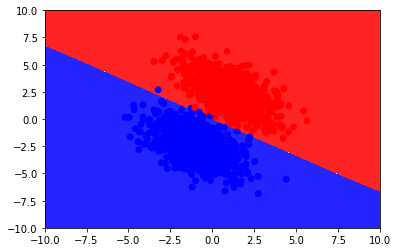

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[197.   0.]
 [  1. 202.]]
Cost for epoch 0 is 0.021546289205640303
Cost for epoch 100 is 0.020737621266263925
Cost for epoch 200 is 0.02000408239879742
Cost for epoch 300 is 0.01933555320699381
Cost for epoch 400 is 0.018723676217442784
Cost for epoch 500 is 0.01816148468337576
Cost for epoch 600 is 0.017643122158918507
Cost for epoch 700 is 0.017163627784840343
Cost for epoch 800 is 0.016718769881501304
Cost for epoch 900 is 0.016304915551908432


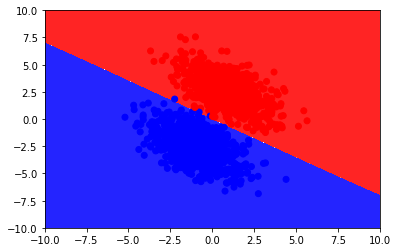

ACCURACY:  0.995
CONFUSION MATRIX: 
 [[203.   0.]
 [  2. 195.]]
Cost for epoch 0 is 0.0198297341115736
Cost for epoch 100 is 0.01936339429478458
Cost for epoch 200 is 0.01892963579150411
Cost for epoch 300 is 0.018525456988963164
Cost for epoch 400 is 0.018148171179899246
Cost for epoch 500 is 0.017795368066853366
Cost for epoch 600 is 0.01746488172626533
Cost for epoch 700 is 0.017154763436700932
Cost for epoch 800 is 0.016863258251964493
Cost for epoch 900 is 0.01658878453437345


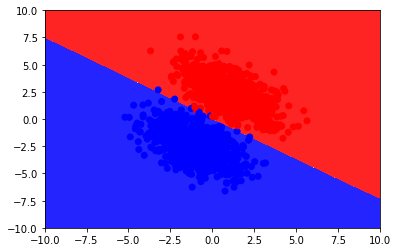

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[192.   0.]
 [  0. 208.]]
Cost for epoch 0 is 0.015713997314010845
Cost for epoch 100 is 0.015460357885001157
Cost for epoch 200 is 0.015220482630769019
Cost for epoch 300 is 0.01499327926566342
Cost for epoch 400 is 0.014777759297637446
Cost for epoch 500 is 0.014573027258584
Cost for epoch 600 is 0.014378271106257485
Cost for epoch 700 is 0.014192753661425014
Cost for epoch 800 is 0.014015804963663059
Cost for epoch 900 is 0.013846815444548634


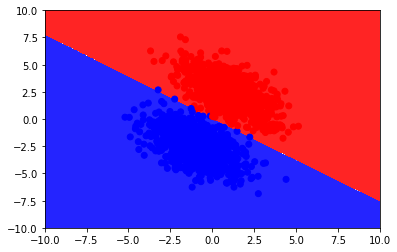

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[202.   0.]
 [  0. 198.]]
Average ACCURACY of 5 folds:  0.998


In [19]:
avg_fold=0
for i in range(5):
    #5. Train the model
    nnmodel.fit(xtrain[i],ytrain[i],1000,alpha=0.01)
    #6. Plot decision boundary after trainning
    plot_decision_boundary(nnmodel, xtrain[i], ytrain[i])
    #7. compute accuracy and confusion matrix
    acc = 0
    y_pred = nnmodel.predict(xtest[i])
    con_mat = np.zeros((output_dim, output_dim))
    for j in range(len(y_pred)):
        con_mat[y_pred[j], ytest[i][j]] += 1
        if ytest[i][j] == y_pred[j]:
            acc += 1
    acc = acc/len(y_pred)
    avg_fold += acc
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    
print ('Average ACCURACY of 5 folds: ', avg_fold / 5)


### Digit Data training

In [20]:
# 1. Load the data
x_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
x_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

In [21]:
# 2. Initialize model
input_dim = np.shape(x_train)[1]
output_dim = np.max(y_train) + 1
hidden_dim = 17
nnmodel =  Neural_Network(input_dim, hidden_dim, output_dim)

In [22]:
# 3. Train the data
nnmodel.fit(x_train, y_train, 10000, alpha=0.01, flag=2)

0

In [23]:
#4. compute accuracy and confusion matrix


In [24]:
accuracy = 0
y_pred = nnmodel.predict(x_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        accuracy += 1
accuracy = accuracy / len(y_pred)
print ('ACCURACY: ', accuracy)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9165739710789766
CONFUSION MATRIX: 
 [[84.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. 75.  0.  1.  0.  1.  1.  0.  3.  0.]
 [ 0.  0. 82.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  3.  4. 77.  0.  0.  0.  1.  0.  1.]
 [ 1.  0.  0.  0. 87.  0.  0.  2.  0.  0.]
 [ 1.  1.  0.  3.  0. 85.  0.  1.  3.  2.]
 [ 2.  1.  0.  0.  1.  1. 90.  0.  0.  0.]
 [ 0.  0.  0.  5.  0.  0.  0. 80.  0.  0.]
 [ 0.  0.  0.  4.  3.  0.  0.  2. 77.  2.]
 [ 0. 11.  0.  0.  1.  4.  0.  2.  3. 87.]]


In [25]:
# 1. Load the data
x_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
x_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

In [26]:
# 2. Initialize model
input_dim = np.shape(x_train)[1]
output_dim = np.max(y_train) + 1
hidden_dim = 17
nnmodel =  Neural_Network(input_dim, hidden_dim, output_dim)

In [27]:
# 3. Train the data
nnmodel.fit_regularization(x_train, y_train, 6000, alpha=0.01,flag = 2)

0

In [28]:
#4. compute accuracy and confusion matrix


In [29]:
accuracy = 0
y_pred = nnmodel.predict_regularization(x_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        accuracy += 1
accuracy = accuracy / len(y_pred)
print ('ACCURACY: ', accuracy)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9310344827586207
CONFUSION MATRIX: 
 [[87.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 76.  0.  3.  0.  0.  1.  0.  4.  0.]
 [ 0.  0. 82.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  4. 80.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  0.  0. 85.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  3.  0. 87.  0.  0.  3.  3.]
 [ 0.  1.  0.  0.  3.  1. 90.  0.  1.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 87.  1.  0.]
 [ 0.  0.  0.  3.  3.  0.  0.  1. 76.  1.]
 [ 0. 12.  0.  0.  1.  3.  0.  1.  1. 87.]]
